<a href="https://colab.research.google.com/github/ctruciosm/ACA124/blob/main/Problema_Designacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da Designação

- O **problema da designação** é um tipo especial de problema de programação linear em que os **designados** estão sendo indicados para a realizaçñao de **tarefas**.
- Os **designados** não precisam ser pessoas, podem ser máquinas, veículos, fábricas ou mesmo períodos a serem destinados às tarefas.
- O **problema da designação** pode ser visto como um caso especial do **problema de transporte**.

## Hipóteses

Assim como em todos os outros casos, este problema assume implicitamente que algumas hipóteses são satisfeitas, sendo elas:

- O número de designados e o número de tarefas **é o mesmo** ($n$).
- Deve-se atribuir a cada designado exatamente **uma tarefa**.
- Cada tarefa deve ser realizada exatamente por um designado.
- Há um custo associado ao designado $i$ executando a tarefa $j$ ($i,j = 1, \cdots, n$.)
- *O objetivo é determinar como todas as $n$ designações devem ser feitas para minimizar o custo total*.

> Qualquer problema que satisfaça essas hipoteses pode ser resolvido através do problema de designação.

## Caso de estudo 

A plataforma de cursos online "AjUdemy" recebe uma demanda para a criação de três novos cursos a serem lançados no mês de junho. No momento, "AjUdemy" dispõe de três professores _freelancers_ que poderiam dar conta da demandas. Contudo, devido às atividades dos professores, cada um deles pode trabalhar apenas em um único curso. Além disso, a política da "AjUdemy" é que apenas um professor desenvolva o curso inteiro. Os valores cobrados por cada professor pela elaboração de cada curso estão disponíveis na seguinte Tabela


| Professores \ Cursos:  | Curso 1  |  Curso 2  |   Curso 3    |
|:----------------------:|:--------:|:---------:|:------------:|
| Professor 1            | 10 000   |  20 000   |   10 000     |
| Professor 2            | 15 000   |  20 000   |    5 000     |
| Professor 3            | 20 000   |  10 000   |   10 000     |


Seja $X_{ij}$ a designação do professor $i$ à tarefa (curso) $j$.

Assim, o problema a ser resolvido é minimizar:

\begin{align}
        Z = \quad & 10 000 X_{11} + 20 000 X_{12} + 10 000X_{13} + \\
                  & 15 000 X_{21} + 20 000 X_{22} + 5 000 X_{23} + \\
                  & 20 000 X_{31} + 10 000 X_{32} + 10 000 X_{33},
\end{align} 

sujeito às restrições:

- $X_{11} + X_{12} + X_{13} = 1$
- $X_{21} + X_{22} + X_{23} = 1$
- $X_{31} + X_{32} + X_{33} = 1$

- $X_{11} + X_{21} + X_{31} = 1$
- $X_{12} + X_{22} + X_{32} = 1$
- $X_{13} + X_{23} + X_{33} = 1$

- $X_{ij} \geq 0$.


Note que o problma pode ser visto como um problema de transporte em que:


| Professores \ Cursos:  | Curso 1  |  Curso 2  |   Curso 3    |    |
|:----------------------:|:--------:|:---------:|:------------:|:--:|
| Professor 1            | 10 000   |  20 000   |   10 000     | 1  |
| Professor 2            | 15 000   |  20 000   |    5 000     | 1  |
| Professor 3            | 20 000   |  10 000   |   10 000     | 1  |
|                        |      1   |       1   |        1     |    |




In [1]:
install.packages("lpSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(lpSolve)

matriz_custos = matrix(c(10000, 15000, 20000, 20000, 20000, 10000, 10000, 5000, 10000), ncol = 3)

s_sinal = rep("=", 3)
s_valores = c(1, 1, 1)

d_sinal = rep("=", 3)
d_valores = c(1, 1, 1)

In [5]:
resultados = lp.transport(matriz_custos, "min", 
                          row.signs = s_sinal, row.rhs = s_valores, 
                          col.signs = d_sinal, col.rhs = d_valores)

In [6]:
resultados$solution

1,0,0
0,0,1
0,1,0


In [7]:
resultados

Success: the objective function is 25000 

> No caso específico do problema da designação, existe uma forma mais eficiente de resolver o problema. Ela está implementada na função `lp.assign` do pacote `lpSolve`

In [8]:
resultados_designacao = lp.assign (matriz_custos, direction = "min")

In [10]:
resultados_designacao$solution

1,0,0
0,0,1
0,1,0


In [11]:
resultados_designacao

Success: the objective function is 25000 


Apenas a maneira de exemplo, compararemos o tempo utilizado em ambos os algoritmos.



In [12]:
install.packages("microbenchmark")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



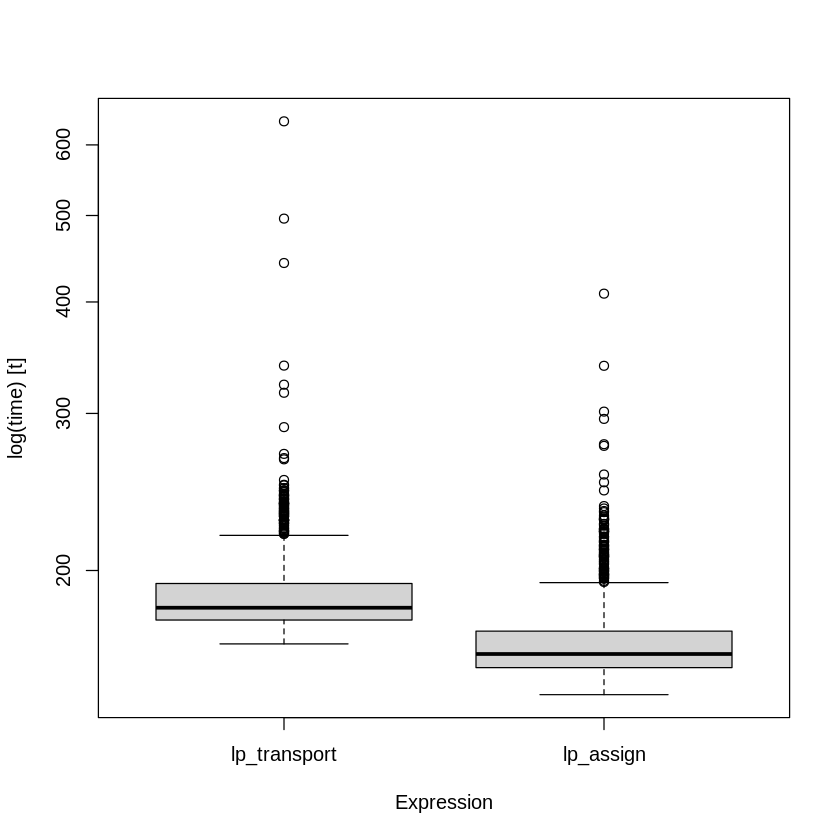

In [22]:
library(microbenchmark)
comparar = microbenchmark(lp_transport = lp.transport(matriz_custos, "min", 
                          row.signs = s_sinal, row.rhs = s_valores, 
                          col.signs = d_sinal, col.rhs = d_valores),
                          lp_assign = lp.assign (matriz_custos, direction = "min"),
                          times = 1000L) 
boxplot(comparar)                                

Utilizar a função `lp.assign()` é muito mais rápido do que utilizar `lp.transport()`. Isto é devido ao fato de que `lp.assign()` utiliza um algoritmo que é mais eficiente para este tipo de problemas.

**Importante:** diversas aplicações não satisfazem as hipóteses do problem da designação e consequentemente não se enquadram (propriamente dito) neste problema. Contudo, é possível reformular o problema para que o problema reformulado satisfaça as hipóteses. Isto é feito através de designados/tarefas **fantasmas**. Não entraremos em detalhe de como fazer isto manualmente mas em como resolver o problema utilizando o **R**.

## Modificação do caso de estudo.

Imagine que no caso de estudo anterior, os dados do problema são como apresentados a seguir:

| Professores \ Cursos:  | Curso 1  |  Curso 2  |   Curso 3    |
|:----------------------:|:--------:|:---------:|:------------:|
| Professor 1            | 10 000   |  20 000   |   10 000     |
| Professor 2            | 15 000   |  20 000   |    5 000     |
| Professor 3            | 20 000   |  10 000   |   10 000     |
| Professor 4            |  5 000   |   5 000   |    5 000     |

O problema não satisfaz as hipóteses necesárias para o problema da designação, mas o problema pode ser visto como um problema de transporte em que:

| Professores \ Cursos:  | Curso 1  |  Curso 2  |   Curso 3   |       |
|:----------------------:|:--------:|:---------:|:-----------:|:-----:|
| Professor 1            | 10 000   |  20 000   |   10 000    |$\leq 1$|
| Professor 2            | 15 000   |  20 000   |    5 000    |$\leq 1$|
| Professor 3            | 20 000   |  10 000   |   10 000    |$\leq 1$|
| Professor 4            |  5 000   |   5 000   |    5 000    |$\leq 1$|
|                        |  = 1     |   = 1     |    = 1      |        |



In [23]:
matriz_custos = matrix(c(10000, 15000, 20000, 5000, 20000, 20000, 10000, 5000, 10000, 5000, 10000, 5000), ncol = 3)
matriz_custos

10000,20000,10000
15000,20000,5000
20000,10000,10000
5000,5000,5000


In [29]:
s_sinal = rep("<=", 4)
s_valores = c(1, 1, 1, 1)

d_sinal = rep("=", 3)
d_valores = c(1, 1, 1)

In [30]:
resultados = lp.transport(matriz_custos, "min", 
                          row.signs = s_sinal, row.rhs = s_valores, 
                          col.signs = d_sinal, col.rhs = d_valores)

In [31]:
resultados$solution

1,0,0
0,0,1
0,0,0
0,1,0


In [33]:
resultados

Success: the objective function is 20000 

**Observação:** a função `lp.assign()` não funciona se as hipóteses do problema da designação não são satisfeitas. Contudo, como o problema de designação é um caso especial do problema de transporte, podemos utilizar a função `lp.transport()`.

## Exemplos

A seguir apresentaremos alguns outros exemplos referentes tanto ao **problema de transporte** quando ao **problema da designação.**

### Exemplo 1

[adaptado de Lachtermacher (2014)] "Velozes e não tão furiosos Ltda" fornece motores para equipes de _Motorcycle racing_ no Brasil. A empresa, detém uma série de contratos de entregas futuras programadas para o próximo ano. As entregas deverão ocorrer trimestralmente, de acordo com as necesidades das equipes. As entregas são feitas no final do trimestre e os motores podem ser armazenados por quantos trimestres forem necessários ao custo de 0.015 milhão de reais por trimestre. Estamos interessados em minimizar os custos totais de produção (produção + armazenagem). Quantos e quando os motores pedidos devem ser produzidos e entregues?. As entregas programadas e capacidade de produção por trimestre, bem como o custo unitário de produção são apresentados na Tabela abaixo.


| Trimestre  | Pedidos Contratados  | Capacidade de Produção | Custo de Produção (em milhoes) |
|:----------:|:--------------------:|:----------------------:|:--------------------:|
| Trimestre 1 | 10  | 25 | 1.08 |
| Trimestre 2 | 15  | 35 | 1.11 |
| Trimestre 3 | 25  | 30 | 1.10 |
| Trimestre 4 | 20  | 10 | 1.13 |




Para resolver o problema, precisamos interpretá-lo e determinar quais serão as **origens**, os **destinos** e as restrições a serem utilizadas. Assim, definimos:

- Origem $i$: número de motores **produzidos** no trimestre $i$.
- Destino $j$: número de motores **entregues** no trimestre $j$.

Com as origens e destinos definidos, podemos construir a seguinte tabela:



| Origens \ Destinos:   | Trimestre 1 | Trimestre 2 | Trimestre 3 | Trimestre 4 | Capacidade de Produção
|:----------:|:--------------------:|:----------------------:|:----------------------:|:--------------------:|:--------------------:|
| Trimestre 1 | 1.08  | 1.095 | 1.110 | 1.125      |  25   |
| Trimestre 2 |  -    | 1.11   | 1.125  | 1.140   |  35   |
| Trimestre 3 |  -    | -      | 1.100    | 1.115   |  30   |
| Trimestre 4 |  -    | -      |  -      | 1.130     |  10   |
| **Pedidos Contratados** |  10  | 15  | 25  | 20 |   |



**Lembre-se:** se podemos apresentar todas as informações referentes ao problema como na Tabela anterior, então podemos utilizar o problema de transporte para obter a solução.

In [48]:
matriz_custos = matrix(c(1.08, 0, 0, 0, 1.095, 1.11, 0, 0, 1.11, 1.125, 1.10, 0, 1.125, 1.114, 1.115, 1.13), ncol = 4)
matriz_custos

1.08,1.095,1.110,1.125
0.00,1.110,1.125,1.114
0.00,0.000,1.100,1.115
0.00,0.000,0.000,1.130


In [49]:
s_sinal = rep("<=", 4)
s_valores = c(25, 35, 30, 10)

d_sinal = rep("=", 4)
d_valores = c(10, 15, 25, 20)

In [50]:
resultados = lp.transport(matriz_custos, "min", 
                          row.signs = s_sinal, row.rhs = s_valores, 
                          col.signs = d_sinal, col.rhs = d_valores)

In [51]:
resultados$solution

0,0,0,0
10,0,0,20
0,15,15,0
0,0,10,0


In [52]:
resultados

Success: the objective function is 38.78 

**Cuidado!** ao não ter nada no campo da tabela podemos pensar em incluir o valor 0. Mas 0 implica que o custo é 0 (e quem não quer algo com custo 0?). Se colocarmoso valor 0, o algoritmo tentará atribuir valores a esses campos (mesmo que sejam impossíveis) pois nosso objetivo é minimizar curtos e que melhor do que gastar 0 reais, certo?.  Uma solução é imcluir um valor absurdamente grande ao ponto que seja pouco interessante atribuir algum valor nesse campo.

In [53]:
matriz_custos = matrix(c(1.08, 1000, 1000, 1000, 1.095, 1.11, 1000, 1000, 1.11, 1.125, 1.10, 1000, 1.125, 1.14, 1.115, 1.13), ncol = 4)

s_sinal = rep("<=", 4)
s_valores = c(25, 35, 30, 10)

d_sinal = rep("=", 4)
d_valores = c(10, 15, 25, 20)

resultados = lp.transport(matriz_custos, "min", 
                          row.signs = s_sinal, row.rhs = s_valores, 
                          col.signs = d_sinal, col.rhs = d_valores)

resultados$solution

10,10,0,5
0,5,0,0
0,0,25,5
0,0,0,10


In [54]:
resultados

Success: the objective function is 77.3 

**Observação:** mas a solução no livro é diferente!

**Lembre-se que podem existir vários ótimos!**

In [55]:
# Avaliando a sol. ótima do livro na função custo:
1.08*10 + 1.095*15 + 1.14*5 + 1.1*25 + 1.115*5 + 1.13*10

[1] 77.3

In [56]:
# Avaliando nossa sol. ótima na função custo
1.08*10 + 1.095*10 + 1.125*5 + 1.11*5 + 1.1*25 + 1.115*5 + 1.13*10

[1] 77.3